# Synthetic Function with Noise

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#### Define function

$y = sin(2\pi x) + \epsilon$

where $\epsilon$ is Gaussian (from normal distribution) noise 

In [38]:
# Define synthetic function
def f(x, epsilon):
    return np.sin(2 * np.pi * x) + epsilon

In [39]:
def generate_train_sample(sd, train_n=1000):    
    train_x = np.random.uniform(-2, 2, train_n)
    train_noise = np.random.normal(0, sd, train_n)
    train_y = f(train_x, train_noise)
    
    return train_x, train_y

In [40]:
def generate_test_sample(sd, test_range=[-2,2], test_n=100):   
    test_x = np.random.uniform(test_range[0], test_range[1], test_n)
    test_noise = np.random.normal(0, sd, test_n)
    test_y = f(test_x, test_noise)
    
    return test_x, test_y
    

### For Noise Level 1, sd = 0.1

In [41]:
x_train, y_train = generate_train_sample(sd=0.1)
x_test_1, y_test_1 = generate_test_sample(sd=0.1, test_range=[-2,2])
x_test_2, y_test_2 = generate_test_sample(sd=0.1, test_range=[2,3])

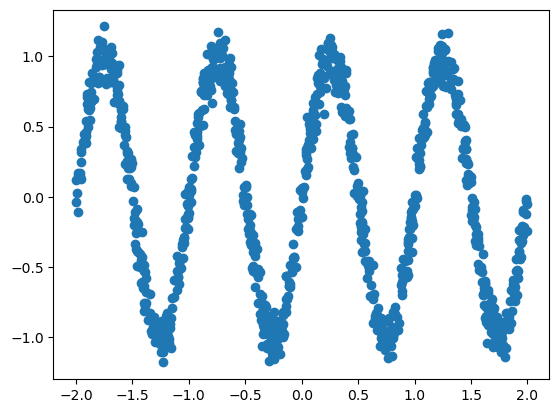

In [42]:
plt.scatter(x_train, y_train)
plt.show()

In [43]:
# Define neural network architecture
inp = tf.keras.layers.Input(shape=(1,))
x = tf.keras.layers.Dense(64, activation='relu')(inp)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)
out = tf.keras.layers.Dense(1)(x)

# Build model
model = tf.keras.Model(inp, out)

# Compile model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse', 'root_mean_squared_error']
)

In [44]:
# Train model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    # callbacks=tf.keras.callbacks.EarlyStopping(patience=4)
)

hist = pd.DataFrame(history.history)
hist.tail()

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4790 - mae: 0.6115 - mse: 0.4790 - root_mean_squared_error: 0.6919 - val_loss: 0.4880 - val_mae: 0.6285 - val_mse: 0.4880 - val_root_mean_squared_error: 0.6985
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4713 - mae: 0.5999 - mse: 0.4713 - root_mean_squared_error: 0.6863 - val_loss: 0.4728 - val_mae: 0.6140 - val_mse: 0.4728 - val_root_mean_squared_error: 0.6876
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4651 - mae: 0.6042 - mse: 0.4651 - root_mean_squared_error: 0.6819 - val_loss: 0.4617 - val_mae: 0.6048 - val_mse: 0.4617 - val_root_mean_squared_error: 0.6795
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4729 - mae: 0.6072 - mse: 0.4729 - root_mean_squared_error: 0.6876 - val_loss: 0.4495 - val_mae: 0.5976 - val_mse: 0.4495 - val_root_mean_squared_error: 0.6705
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4301 - mae: 0.5747 - mse: 0.4301 - root_mean_squared_er

,loss,mae,mse,root_mean_squared_error,val_loss,val_mae,val_mse,val_root_mean_squared_error
95,0.037289,0.137211,0.037289,0.193103,0.031114,0.126773,0.031114,0.176392
96,0.037504,0.137978,0.037504,0.193660,0.031693,0.128228,0.031693,0.178025
97,0.035120,0.130971,0.035120,0.187403,0.029263,0.119395,0.029263,0.171066
98,0.034812,0.132162,0.034812,0.186580,0.029460,0.123370,0.029460,0.171639
99,0.035540,0.133380,0.035540,0.188519,0.028056,0.117909,0.028056,0.167499


In [45]:
# Define a function to handle plot of model training performance
def plot_losses():
    plt.figure(figsize=(15,4))

    plt.subplot(1,3,1)
    plt.plot(hist.loss, label="train loss")
    plt.plot(hist.val_loss, label="validation loss")
    plt.title("MSE")
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(hist.mae, label="train mae")
    plt.plot(hist.val_mae, label="validation mae")
    plt.title("MAE")
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(hist.root_mean_squared_error, label="train rmse")
    plt.plot(hist.val_root_mean_squared_error, label="validation rmse")
    plt.title("RMSE")
    plt.legend()
    
    plt.show()

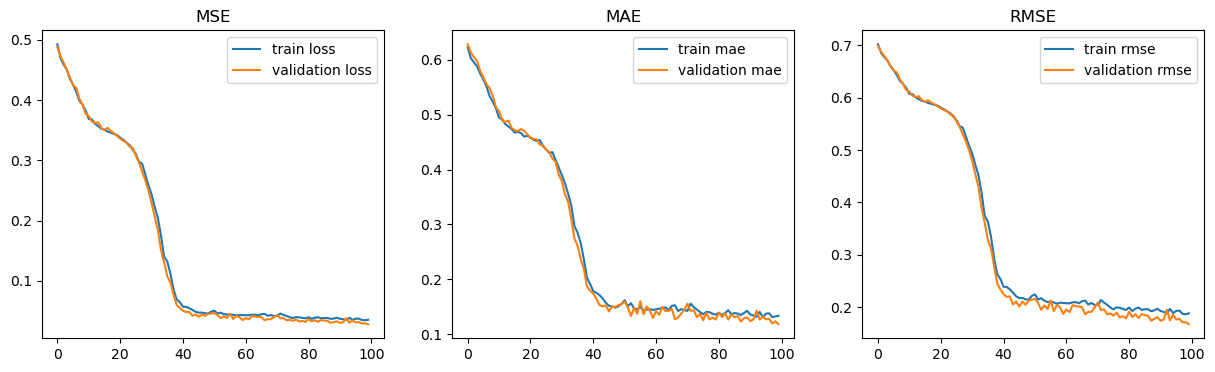

In [46]:
plot_losses()

In [47]:
# Define a function to handle reporting and handling of results
def report_performance(x_test, y_test, model=model):
    loss, mae, _, root_mean_squared_error = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Loss: {loss}")
    print(f"Test MAE: {mae}")
    print(f"Test RMSE: {root_mean_squared_error}")

    y_pred = model.predict(x_test, verbose=0)

    plt.figure(figsize=(6,4))
    plt.scatter(x_test, y_test, label="ground truth")
    plt.scatter(x_test, y_pred, label="prediction")
    plt.legend()
    plt.show()

#### Results - Same range as training [-2,2]

Test Loss: 0.023760447278618813
Test MAE: 0.11104241013526917
Test RMSE: 0.15414424240589142


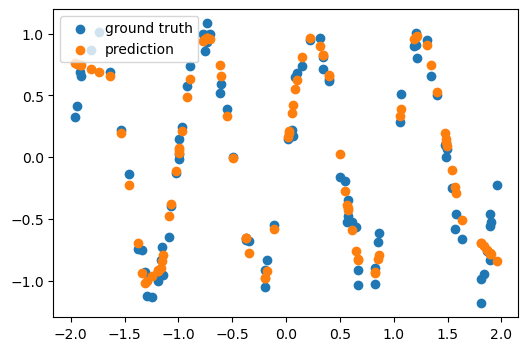

In [48]:
report_performance(x_test_1, y_test_1)

#### Results - Extrapolated range [2,3]

Test Loss: 1.7867610454559326
Test MAE: 1.1898113489151
Test RMSE: 1.3366978168487549


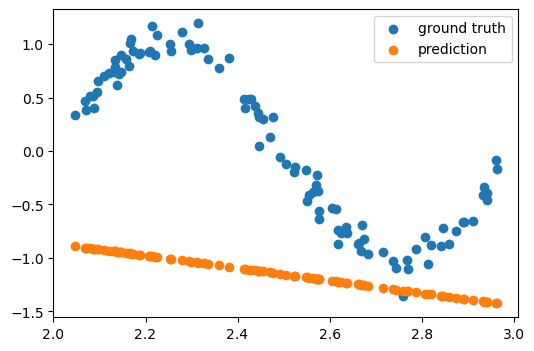

In [49]:
report_performance(x_test_2, y_test_2) # Extrapolated range

### For Noise Level 2, sd = 0.25

In [50]:
x_train, y_train = generate_train_sample(sd=0.25)
x_test_1, y_test_1 = generate_test_sample(sd=0.25, test_range=[-2,2])
x_test_2, y_test_2 = generate_test_sample(sd=0.25, test_range=[2,3])

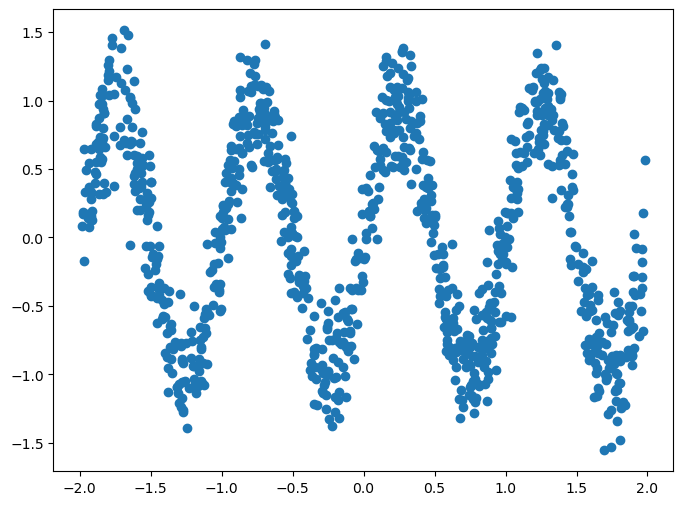

In [51]:
# Visualize signal
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train)
plt.show()

In [52]:
# Train model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    # callbacks=tf.keras.callbacks.EarlyStopping(patience=4)
)

hist = pd.DataFrame(history.history)
hist.tail()

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0844 - mae: 0.2256 - mse: 0.0844 - root_mean_squared_error: 0.2896 - val_loss: 0.0733 - val_mae: 0.2120 - val_mse: 0.0733 - val_root_mean_squared_error: 0.2707
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0851 - mae: 0.2292 - mse: 0.0851 - root_mean_squared_error: 0.2917 - val_loss: 0.0831 - val_mae: 0.2281 - val_mse: 0.0831 - val_root_mean_squared_error: 0.2883
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0738 - mae: 0.2180 - mse: 0.0738 - root_mean_squared_error: 0.2712 - val_loss: 0.0801 - val_mae: 0.2225 - val_mse: 0.0801 - val_root_mean_squared_error: 0.2830
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0831 - mae: 0.2268 - mse: 0.0831 - root_mean_squared_error: 0.2882 - val_loss: 0.0764 - val_mae: 0.2196 - val_mse: 0.0764 - val_root_mean_squared_error: 0.2764
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0786 - mae: 0.2237 - mse: 0.0786 - root_mean_squared_er

,loss,mae,mse,root_mean_squared_error,val_loss,val_mae,val_mse,val_root_mean_squared_error
95,0.073484,0.215591,0.073484,0.271080,0.073989,0.217147,0.073989,0.272009
96,0.071684,0.211909,0.071684,0.267739,0.071875,0.207280,0.071875,0.268095
97,0.075422,0.220446,0.075422,0.274631,0.070469,0.210047,0.070469,0.265461
98,0.076867,0.220089,0.076867,0.277248,0.074996,0.213028,0.074996,0.273853
99,0.074257,0.216475,0.074257,0.272502,0.069398,0.203510,0.069398,0.263435


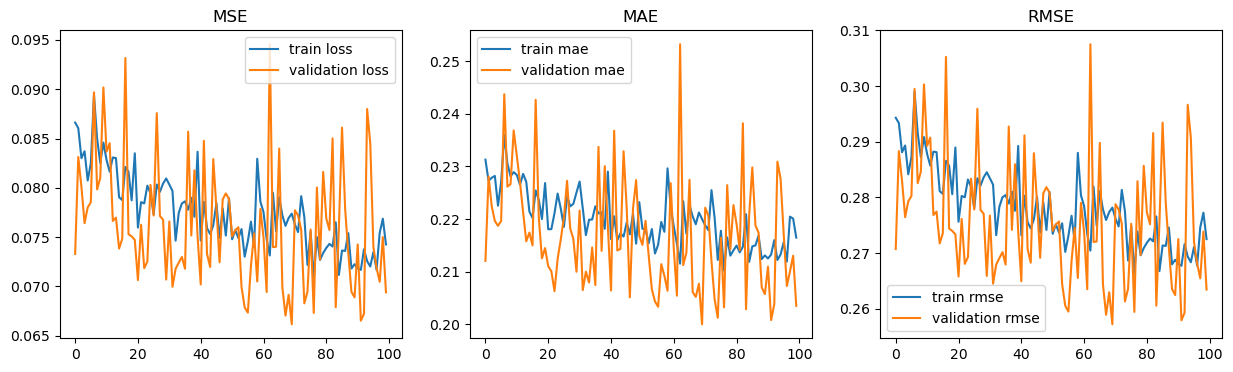

In [53]:
plot_losses()

#### Results - Same range as training [-2,2]

Test Loss: 0.08437135070562363
Test MAE: 0.22861036658287048
Test RMSE: 0.2904674708843231


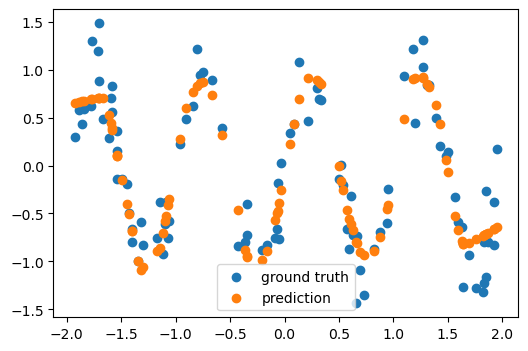

In [54]:
report_performance(x_test_1, y_test_1)

#### Results - Extrapolated range [2,3]

Test Loss: 1.1293483972549438
Test MAE: 0.885079026222229
Test RMSE: 1.0627080202102661


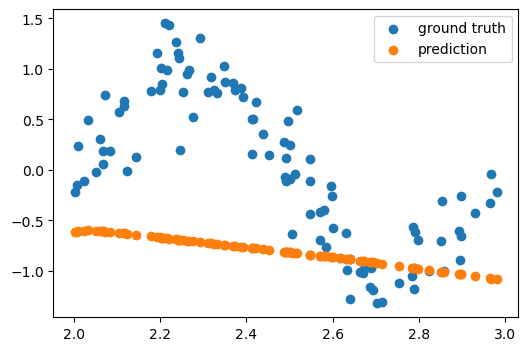

In [55]:
report_performance(x_test_2, y_test_2)

### For Noise Level 3, sd = 1

In [56]:
x_train, y_train = generate_train_sample(sd=1)
x_test_1, y_test_1 = generate_test_sample(sd=1, test_range=[-2,2])
x_test_2, y_test_2 = generate_test_sample(sd=1, test_range=[2,3])

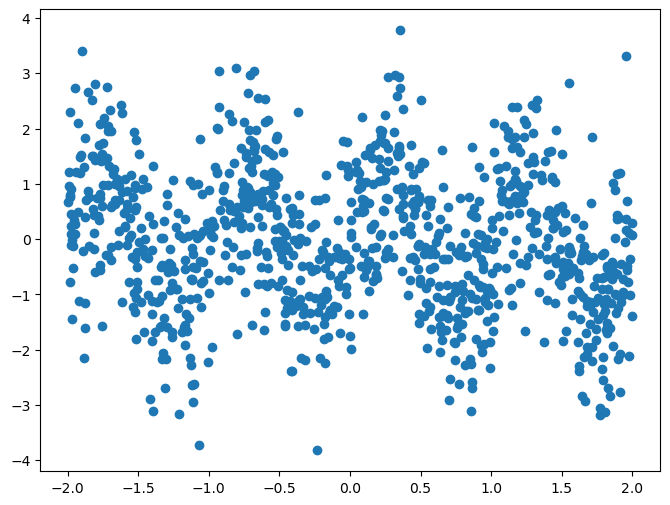

In [57]:
# Visualize signal
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train)
plt.show()

In [58]:
# Train model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    # callbacks=tf.keras.callbacks.EarlyStopping(patience=4)
)

hist = pd.DataFrame(history.history)
hist.tail()

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0708 - mae: 0.8126 - mse: 1.0708 - root_mean_squared_error: 1.0346 - val_loss: 1.1761 - val_mae: 0.8582 - val_mse: 1.1761 - val_root_mean_squared_error: 1.0845
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1423 - mae: 0.8594 - mse: 1.1423 - root_mean_squared_error: 1.0685 - val_loss: 1.1771 - val_mae: 0.8270 - val_mse: 1.1771 - val_root_mean_squared_error: 1.0850
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0674 - mae: 0.8154 - mse: 1.0674 - root_mean_squared_error: 1.0326 - val_loss: 1.1511 - val_mae: 0.8227 - val_mse: 1.1511 - val_root_mean_squared_error: 1.0729
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9877 - mae: 0.7940 - mse: 0.9877 - root_mean_squared_error: 0.9929 - val_loss: 1.2012 - val_mae: 0.8453 - val_mse: 1.2012 - val_root_mean_squared_error: 1.0960
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0193 - mae: 0.8105 - mse: 1.0193 - root_mean_squared_er

,loss,mae,mse,root_mean_squared_error,val_loss,val_mae,val_mse,val_root_mean_squared_error
95,0.994718,0.785901,0.994718,0.997355,1.101432,0.827655,1.101432,1.049492
96,0.995102,0.785975,0.995102,0.997548,1.100571,0.820849,1.100571,1.049081
97,0.995237,0.785153,0.995237,0.997615,1.098266,0.825484,1.098266,1.047982
98,0.992971,0.782862,0.992971,0.996480,1.100907,0.815127,1.100907,1.049241
99,0.991460,0.783903,0.991460,0.995721,1.096966,0.818215,1.096966,1.047361


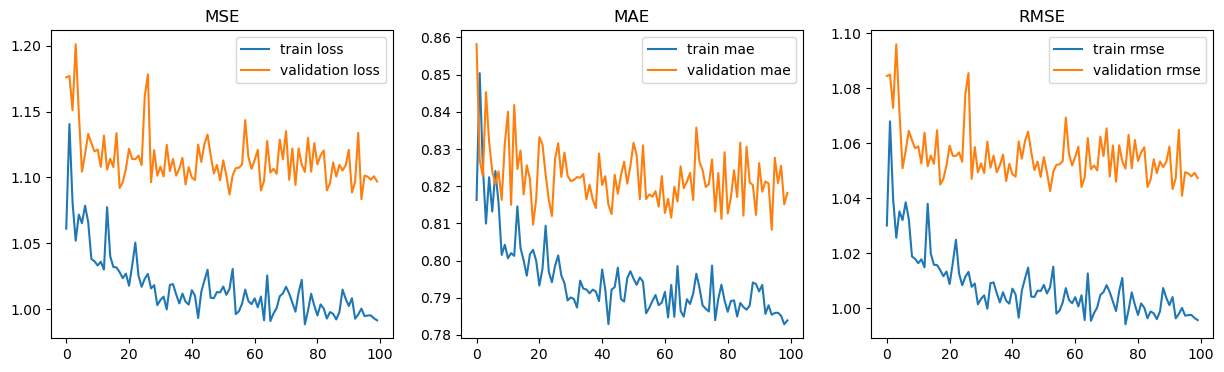

In [59]:
plot_losses()

#### Results - Same as training range [-2,2]

Test Loss: 0.937174379825592
Test MAE: 0.7900397777557373
Test RMSE: 0.9680776596069336


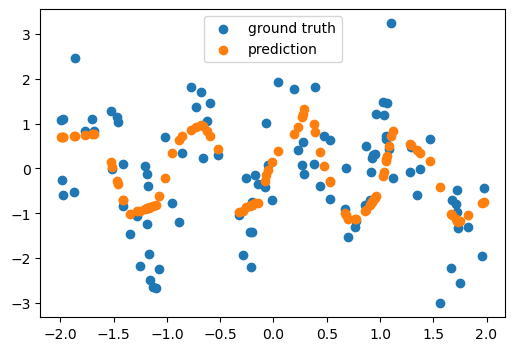

In [60]:
report_performance(x_test_1, y_test_1)

#### Results - Extrapolated range [2,3]

Test Loss: 1.8332618474960327
Test MAE: 1.123026728630066
Test RMSE: 1.3539799451828003


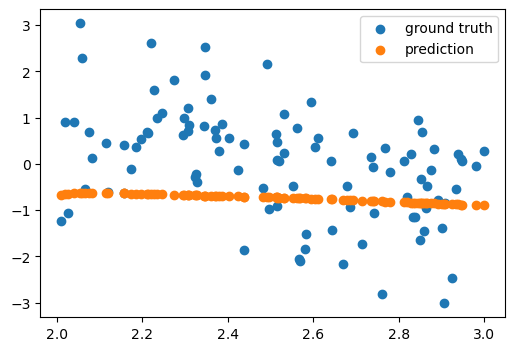

In [61]:
report_performance(x_test_2, y_test_2)

### Trying a different architecture

In [62]:
# Define neural network architecture
inp = tf.keras.layers.Input(shape=(1,))
x = tf.keras.layers.Dense(64, activation='relu')(inp)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
out = tf.keras.layers.Dense(1)(x)

# Build model
model2 = tf.keras.Model(inp, out)

# Compile model
model2.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse', 'root_mean_squared_error']
)

In [63]:
# For Noise Level 1, sd = 0.1
x_train, y_train = generate_train_sample(sd=0.1)
x_test_1, y_test_1 = generate_test_sample(sd=0.1, test_range=[-2,2])
x_test_2, y_test_2 = generate_test_sample(sd=0.1, test_range=[2,3])

In [64]:
# Train model
history = model2.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    # callbacks=tf.keras.callbacks.EarlyStopping(patience=4)
)

hist = pd.DataFrame(history.history)
hist.tail()

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5434 - mae: 0.6541 - mse: 0.5434 - root_mean_squared_error: 0.7368 - val_loss: 0.4972 - val_mae: 0.6422 - val_mse: 0.4972 - val_root_mean_squared_error: 0.7052
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4918 - mae: 0.6238 - mse: 0.4918 - root_mean_squared_error: 0.7013 - val_loss: 0.4800 - val_mae: 0.6272 - val_mse: 0.4800 - val_root_mean_squared_error: 0.6929
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4784 - mae: 0.6099 - mse: 0.4784 - root_mean_squared_error: 0.6916 - val_loss: 0.4662 - val_mae: 0.6075 - val_mse: 0.4662 - val_root_mean_squared_error: 0.6828
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4476 - mae: 0.5837 - mse: 0.4476 - root_mean_squared_error: 0.6690 - val_loss: 0.4408 - val_mae: 0.5906 - val_mse: 0.4408 - val_root_mean_squared_error: 0.6639
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4296 - mae: 0.5687 - mse: 0.4296 - root_mean_squared_e

,loss,mae,mse,root_mean_squared_error,val_loss,val_mae,val_mse,val_root_mean_squared_error
95,0.012733,0.089887,0.012733,0.112841,0.016682,0.102039,0.016682,0.129161
96,0.014600,0.094383,0.014600,0.120829,0.015584,0.100709,0.015584,0.124834
97,0.013489,0.091154,0.013489,0.116141,0.018297,0.103822,0.018297,0.135265
98,0.017612,0.104257,0.017612,0.132710,0.018845,0.110803,0.018845,0.137278
99,0.015959,0.100099,0.015959,0.126327,0.013356,0.089170,0.013356,0.115567


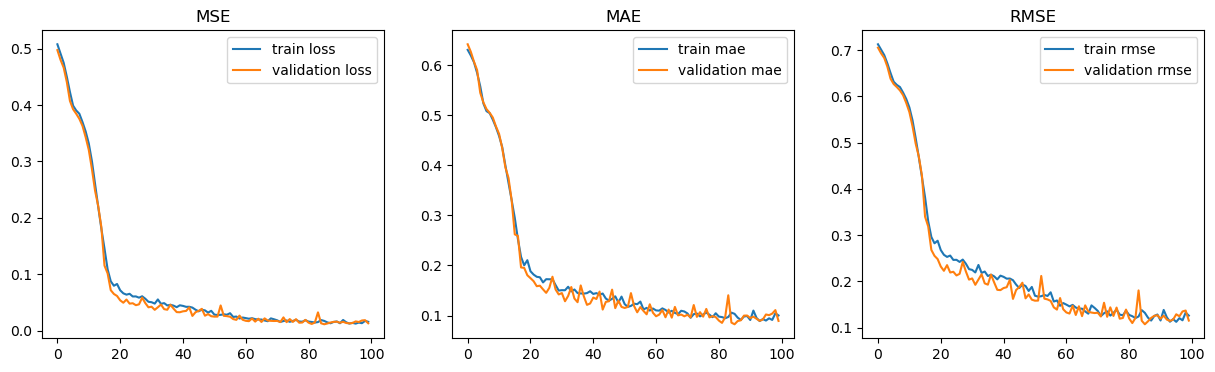

In [65]:
plot_losses()

#### Results - Same as training range [-2,2]

Test Loss: 0.05410012602806091
Test MAE: 0.18018002808094025
Test RMSE: 0.2325943410396576


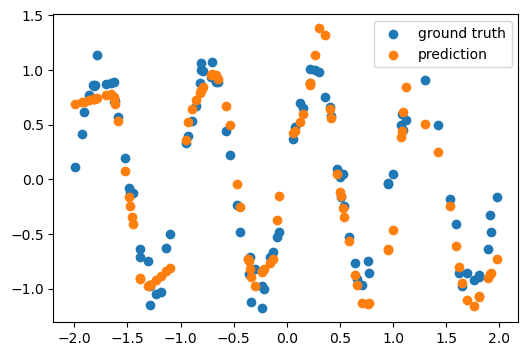

In [66]:
report_performance(x_test_1, y_test_1)

#### Results - Extrapolated range [2,3]

Test Loss: 1.0972025394439697
Test MAE: 0.8550436496734619
Test RMSE: 1.0474743843078613


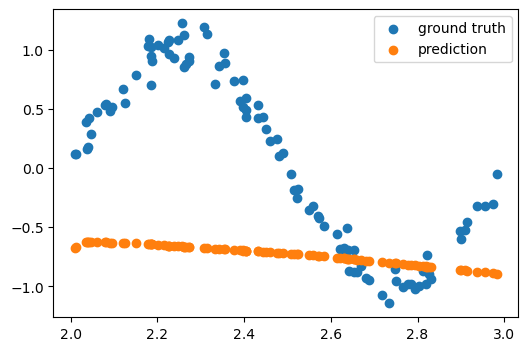

In [67]:
report_performance(x_test_2, y_test_2)

### L2 Regularization and Dropout

In [68]:
# Define neural network architecture
inp = tf.keras.layers.Input(shape=(1,))
x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inp)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
out = tf.keras.layers.Dense(1)(x)

# Build model
model = tf.keras.Model(inp, out)

# Compile model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse', 'root_mean_squared_error']
)

# Train model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    # callbacks=tf.keras.callbacks.EarlyStopping(patience=4)
)

hist = pd.DataFrame(history.history)
hist.tail()

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.3433 - mae: 0.6451 - mse: 0.5282 - root_mean_squared_error: 0.7268 - val_loss: 1.9866 - val_mae: 0.6585 - val_mse: 0.5211 - val_root_mean_squared_error: 0.7219
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8936 - mae: 0.6496 - mse: 0.5282 - root_mean_squared_error: 0.7267 - val_loss: 1.6033 - val_mae: 0.6525 - val_mse: 0.5139 - val_root_mean_squared_error: 0.7168
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5257 - mae: 0.6431 - mse: 0.5133 - root_mean_squared_error: 0.7164 - val_loss: 1.3111 - val_mae: 0.6503 - val_mse: 0.5099 - val_root_mean_squared_error: 0.7141
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2593 - mae: 0.6389 - mse: 0.5165 - root_mean_squared_error: 0.7187 - val_loss: 1.0953 - val_mae: 0.6516 - val_mse: 0.5107 - val_root_mean_squared_error: 0.7146
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0628 - mae: 0.6406 - mse: 0.5206 - root_mean_squared_er

,loss,mae,mse,root_mean_squared_error,val_loss,val_mae,val_mse,val_root_mean_squared_error
95,0.515569,0.630008,0.503601,0.709648,0.516745,0.645966,0.503786,0.709779
96,0.515279,0.628562,0.502462,0.708846,0.514340,0.644629,0.501862,0.708422
97,0.518555,0.631257,0.505580,0.711041,0.515135,0.644239,0.501908,0.708455
98,0.519539,0.632308,0.506923,0.711985,0.515966,0.647042,0.504306,0.710145
99,0.516111,0.632228,0.504001,0.709930,0.516677,0.645634,0.503724,0.709735


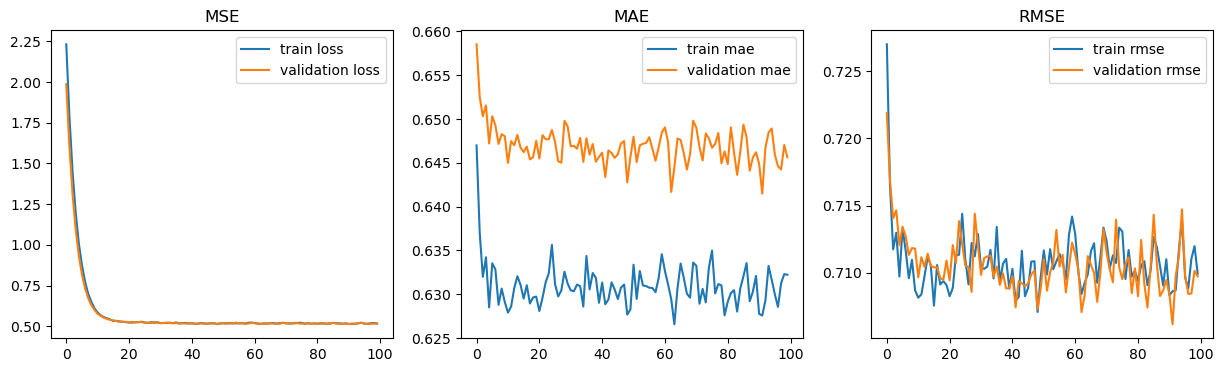

In [69]:
plot_losses()

#### Results - Same as training range [-2,2]

Test Loss: 0.05410012602806091
Test MAE: 0.18018002808094025
Test RMSE: 0.2325943410396576


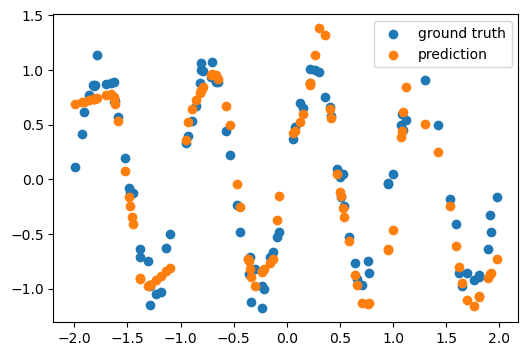

In [70]:
report_performance(x_test_1, y_test_1)

#### Results - Same as training range [2,3]

Test Loss: 1.0972025394439697
Test MAE: 0.8550436496734619
Test RMSE: 1.0474743843078613


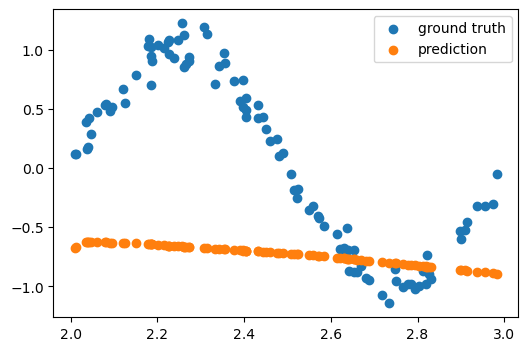

In [71]:
report_performance(x_test_2, y_test_2)

## Using `keras-tuner` for hyperparameter tuning

In [72]:
import keras_tuner as kt

In [73]:
# Define hyperband model for tuning
def build_model(hp):

    inp = x = tf.keras.layers.Input(shape=(1,))

    number_of_hidden_layers = hp.Int(
        "num_layers", 4, 6
    )

    for i in range(number_of_hidden_layers):
        units = hp.Int("units", min_value=64, max_value=128, step=16)
        
        # add l2-regularization
        x = tf.keras.layers.Dense(
            units,
            activation="relu",
            kernel_initializer="he_normal",
            kernel_regularizer=tf.keras.regularizers.l2(0.01),
        )(x)
        
        # add dropout
        x = tf.keras.layers.Dropout(rate=hp.Float("dropout_rate", 0.2, 0.5, step=0.1))(x)

    out = tf.keras.layers.Dense(1)(x)

    # Define model
    model = tf.keras.Model(inp, out)
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae', 'mse', 'root_mean_squared_error']
    )

    return model

#### For Noise Level 1, sd = 0.1

In [74]:
x_train, y_train = generate_train_sample(sd=0.1)
x_test_1, y_test_1 = generate_test_sample(sd=0.1, test_range=[-2,2])
x_test_2, y_test_2 = generate_test_sample(sd=0.1, test_range=[2,3])

In [75]:
tuner = kt.Hyperband(
    build_model, objective="val_loss", max_epochs=200, overwrite=True
)

tuner.search(
    x_train, y_train, validation_split=0.2, epochs=40
)

Trial 37 Complete [00h 00m 02s]
val_loss: 9.077566146850586

Best val_loss So Far: 5.071953773498535
Total elapsed time: 00h 01m 01s


In [76]:
# Get the best trial (the one with the lowest validation loss or other objective)
best_trial = tuner.oracle.get_best_trials()[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_trial.hyperparameters.values)

Best Hyperparameters: {'num_layers': 4, 'units': 64, 'dropout_rate': 0.4, 'tuner/epochs': 3, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}


In [77]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    x_train, y_train, validation_split=0.2, epochs=50
)

hist = pd.DataFrame(history.history)
hist.tail()

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 20.7689 - mae: 2.6548 - mse: 15.5673 - root_mean_squared_error: 3.9178 - val_loss: 5.6689 - val_mae: 0.6711 - val_mse: 0.5481 - val_root_mean_squared_error: 0.7403
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7203 - mae: 1.7288 - mse: 6.6191 - root_mean_squared_error: 2.5553 - val_loss: 5.6946 - val_mae: 0.7079 - val_mse: 0.6469 - val_root_mean_squared_error: 0.8043
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7112 - mae: 1.3756 - mse: 3.6796 - root_mean_squared_error: 1.9173 - val_loss: 5.5530 - val_mae: 0.6825 - val_mse: 0.5684 - val_root_mean_squared_error: 0.7539
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4648 - mae: 1.1706 - mse: 2.4949 - root_mean_squared_error: 1.5782 - val_loss: 5.4867 - val_mae: 0.6784 - val_mse: 0.5605 - val_root_mean_squared_error: 0.7487
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7109 - mae: 0.9742 - mse: 1.7986 - root_mean_squared_erro

,loss,mae,mse,root_mean_squared_error,val_loss,val_mae,val_mse,val_root_mean_squared_error
45,3.490294,0.625573,0.508887,0.713363,3.503691,0.667372,0.543303,0.737091
46,3.455520,0.627780,0.514498,0.717285,3.463178,0.667256,0.543067,0.736930
47,3.401474,0.621255,0.500421,0.707404,3.423158,0.667085,0.542796,0.736747
48,3.358351,0.617424,0.496970,0.704961,3.383415,0.666868,0.542479,0.736532
49,3.337605,0.630136,0.515474,0.717965,3.344134,0.666788,0.542396,0.736475


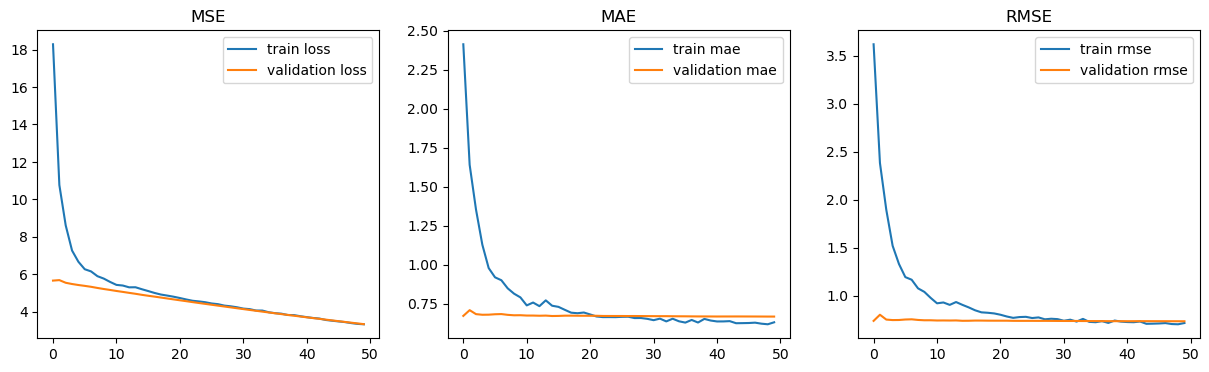

In [78]:
plot_losses()

#### Results - Same as training range [-2,2]

Test Loss: 3.262021780014038
Test MAE: 0.5992211699485779
Test RMSE: 0.6784420609474182


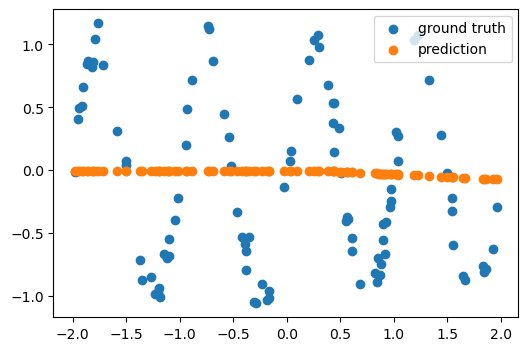

In [79]:
report_performance(x_test_1, y_test_1, model=best_model)

#### Results - Extrapolated range [2,3]

Test Loss: 3.264176845550537
Test MAE: 0.6061967015266418
Test RMSE: 0.68002849817276


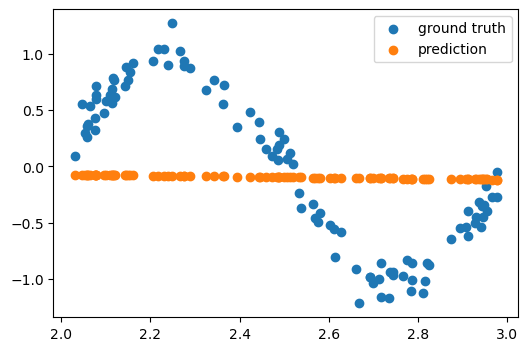

In [80]:
report_performance(x_test_2, y_test_2, model=best_model)

#### For Noise Level 2, sd = 0.25

In [81]:
x_train, y_train = generate_train_sample(sd=0.25)
x_test_1, y_test_1 = generate_test_sample(sd=0.25, test_range=[-2,2])
x_test_2, y_test_2 = generate_test_sample(sd=0.25, test_range=[2,3])

In [82]:
tuner = kt.Hyperband(
    build_model, objective="val_loss", max_epochs=100, overwrite=True
)

tuner.search(
    x_train, y_train, validation_split=0.2, epochs=20
)

Trial 42 Complete [00h 00m 02s]
val_loss: 9.135017395019531

Best val_loss So Far: 4.881175994873047
Total elapsed time: 00h 01m 21s


In [83]:
# Get the best trial (the one with the lowest validation loss or other objective)
best_trial = tuner.oracle.get_best_trials()[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_trial.hyperparameters.values)

Best Hyperparameters: {'num_layers': 4, 'units': 64, 'dropout_rate': 0.2, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}


In [84]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    x_train, y_train, validation_split=0.2, epochs=50
)

hist = pd.DataFrame(history.history)
hist.tail()

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.5603 - mae: 1.2318 - mse: 2.7375 - root_mean_squared_error: 1.6418 - val_loss: 5.2552 - val_mae: 0.6605 - val_mse: 0.5755 - val_root_mean_squared_error: 0.7586
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9405 - mae: 0.8595 - mse: 1.3063 - root_mean_squared_error: 1.1397 - val_loss: 5.1274 - val_mae: 0.6840 - val_mse: 0.6275 - val_root_mean_squared_error: 0.7922
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2828 - mae: 0.7418 - mse: 0.8264 - root_mean_squared_error: 0.9089 - val_loss: 4.9160 - val_mae: 0.6650 - val_mse: 0.5883 - val_root_mean_squared_error: 0.7670
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0631 - mae: 0.7349 - mse: 0.7769 - root_mean_squared_error: 0.8811 - val_loss: 4.7280 - val_mae: 0.6495 - val_mse: 0.5645 - val_root_mean_squared_error: 0.7513
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8444 - mae: 0.6969 - mse: 0.7206 - root_mean_squared_error: 

,loss,mae,mse,root_mean_squared_error,val_loss,val_mae,val_mse,val_root_mean_squared_error
45,1.508018,0.614415,0.522372,0.722753,1.533047,0.651269,0.564438,0.751291
46,1.469781,0.612059,0.516622,0.718764,1.500332,0.650485,0.563447,0.750631
47,1.442772,0.612740,0.520562,0.721500,1.468208,0.648345,0.561860,0.749573
48,1.410066,0.613302,0.518192,0.719856,1.438916,0.649059,0.562482,0.749988
49,1.381648,0.612747,0.519076,0.720469,1.409910,0.648338,0.562253,0.749836


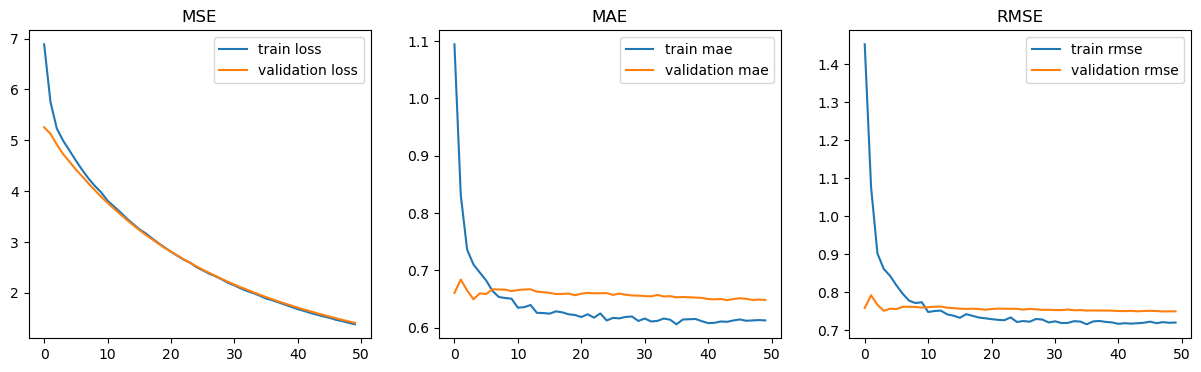

In [85]:
plot_losses()

#### Results - Same as training range [-2,2]

Test Loss: 1.3558802604675293
Test MAE: 0.5987210273742676
Test RMSE: 0.712898313999176


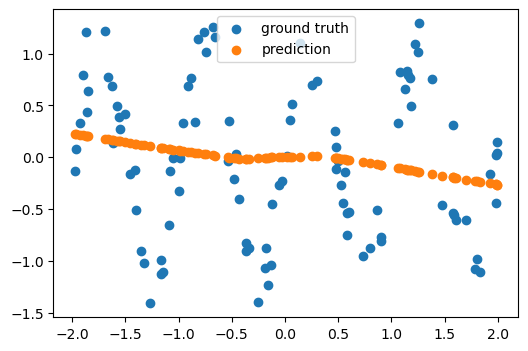

In [86]:
report_performance(x_test_1, y_test_1, model=best_model)

#### Results - Extrapolated range [2,3]

Test Loss: 1.5044816732406616
Test MAE: 0.6932131052017212
Test RMSE: 0.8104475736618042


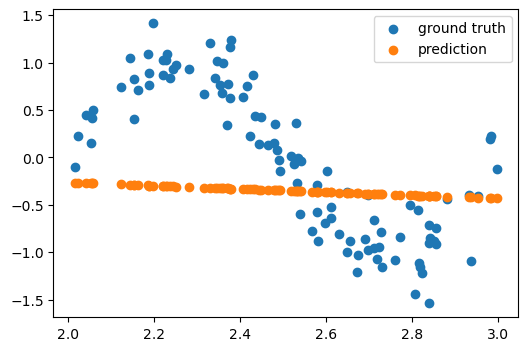

In [87]:
report_performance(x_test_2, y_test_2, model=best_model)

#### For Noise Level 3, sd = 1

In [88]:
x_train, y_train = generate_train_sample(sd=1.0)
x_test_1, y_test_1 = generate_test_sample(sd=1.0, test_range=[-2,2])
x_test_2, y_test_2 = generate_test_sample(sd=1.0, test_range=[2,3])

In [89]:
tuner = kt.Hyperband(
    build_model, objective="val_loss", max_epochs=100, overwrite=True
)

tuner.search(
    x_train, y_train, validation_split=0.2, epochs=20
)

Trial 45 Complete [00h 00m 03s]
val_loss: 15.623791694641113

Best val_loss So Far: 6.0469136238098145
Total elapsed time: 00h 01m 48s


In [90]:
# Get the best trial (the one with the lowest validation loss or other objective)
best_trial = tuner.oracle.get_best_trials()[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_trial.hyperparameters.values)

Best Hyperparameters: {'num_layers': 4, 'units': 64, 'dropout_rate': 0.2, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}


In [91]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    x_train, y_train, validation_split=0.2, epochs=50
)

hist = pd.DataFrame(history.history)
hist.tail()

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.5761 - mae: 1.4610 - mse: 3.6255 - root_mean_squared_error: 1.8937 - val_loss: 6.3700 - val_mae: 1.0372 - val_mse: 1.5616 - val_root_mean_squared_error: 1.2496
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7458 - mae: 1.1298 - mse: 1.9783 - root_mean_squared_error: 1.4062 - val_loss: 6.2175 - val_mae: 1.0409 - val_mse: 1.5717 - val_root_mean_squared_error: 1.2537
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4250 - mae: 1.0804 - mse: 1.8182 - root_mean_squared_error: 1.3481 - val_loss: 6.0815 - val_mae: 1.0400 - val_mse: 1.5899 - val_root_mean_squared_error: 1.2609
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2028 - mae: 1.0242 - mse: 1.7483 - root_mean_squared_error: 1.3219 - val_loss: 5.9250 - val_mae: 1.0385 - val_mse: 1.5801 - val_root_mean_squared_error: 1.2570
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8826 - mae: 1.0023 - mse: 1.5732 - root_mean_squared_error: 

,loss,mae,mse,root_mean_squared_error,val_loss,val_mae,val_mse,val_root_mean_squared_error
45,2.782776,0.981256,1.523654,1.234364,2.803636,1.032396,1.564032,1.250613
46,2.750033,0.985552,1.528377,1.236275,2.766340,1.033276,1.563887,1.250555
47,2.712188,0.982562,1.527052,1.235740,2.733931,1.033950,1.567533,1.252012
48,2.682177,0.981139,1.532501,1.237942,2.698452,1.033350,1.566796,1.251717
49,2.636053,0.980790,1.520872,1.233236,2.663268,1.033506,1.565801,1.251320


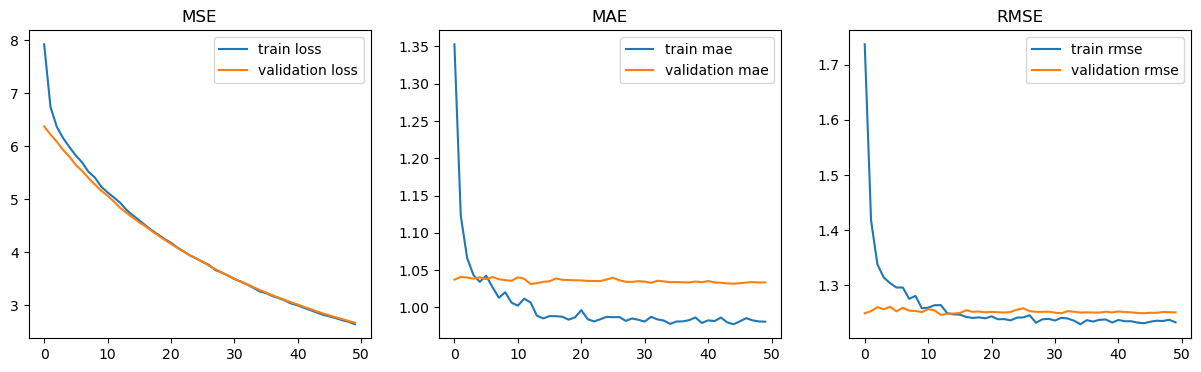

In [92]:
plot_losses()

#### Results - Same as training range [-2,2]

Test Loss: 2.6075475215911865
Test MAE: 1.0052043199539185
Test RMSE: 1.2288531064987183


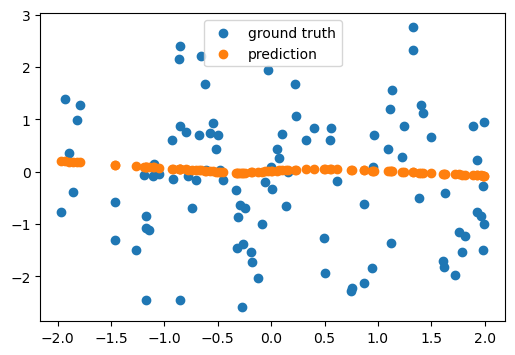

In [93]:
report_performance(x_test_1, y_test_1, model=best_model)

#### Results - Extrapolated range [2,3]

Test Loss: 2.857607126235962
Test MAE: 1.076704978942871
Test RMSE: 1.326702356338501


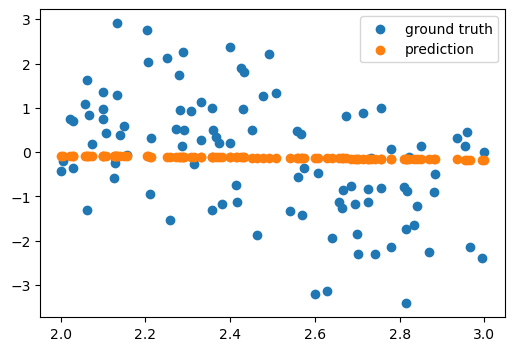

In [94]:
report_performance(x_test_2, y_test_2, model=best_model)

# Conclusion

1. The MLP struggles to generalize well to unseen data in both in-distribution and out-of-distribution ranges. 

2. We notice that the model performance reduces as the noise (variation) increases.

3. Regularization (L2 and Dropout) does not improve any of my metrics significantly in all the models tested.
